<a href="https://colab.research.google.com/github/NabhyaIoT2026/Brain_Tumor/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035 (from 1)
Receiving objects: 100% (3039/3039), 79.25 MiB | 23.95 MiB/s, done.


In [2]:
!pwd

/content


In [3]:
!pip install tensorflow


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np
import random
import os
from tqdm import tqdm
import pickle
import cv2

In [5]:
# Define necessary constants
TEST_DIR = '/content/Brain-Tumor-Classification-DataSet/Testing'
TRAIN_DIR = '/content/Brain-Tumor-Classification-DataSet/Training'
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(TRAIN_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          training_data.append([new_array, class_num])

    random.shuffle(training_data)

create_training_data()
#np.save('train_data.npy', training_data)
print(len(training_data))

print("train")
print()
X_train = np.array([i[0] for i in training_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_train = [i[1] for i in training_data]

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

100%|██████████| 827/827 [00:03<00:00, 246.15it/s]


2870
train



In [7]:
# Creating testing dataset
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(TEST_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
          img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          testing_data.append([new_array, class_num])

    random.shuffle(testing_data)

create_testing_data()
#np.save('testing_data.npy', testing_data)
print(len(testing_data))

print("testing")
print()
X_test= np.array([i[0] for i in testing_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y_test = [i[1] for i in testing_data]

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

100%|██████████| 74/74 [00:00<00:00, 195.40it/s]


394
testing



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import keras.optimizers
from sklearn.metrics import classification_report
import keras.optimizers
from keras.applications import vgg16
import numpy as np


Model 1:VGG16


In [9]:
tensorboard = TensorBoard(log_dir='./VGG16logs', histogram_freq=0,
                          write_graph=True, write_images=False)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [10]:
# We'll use VGG16 to quickly define a model
vgg16_model = vgg16.VGG16()
vgg16_model.summary()
type(vgg16_model)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

keras.src.models.functional.Functional

In [11]:

# Dropping last layers
model = Sequential()
for layer in vgg16_model.layers[:-3]:
    model.add(layer)


for layer in model.layers:
    layer.trainable = True

# Adding last Dense Layer
model.add(Dense(4,activation = 'softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │         100,356 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 14,815,044 (56.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= "adam",
              metrics=['accuracy'],
              )

In [13]:

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [14]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 121s 829ms/step - accuracy: 0.3227 - loss: 2.0930
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 69s 490ms/step - accuracy: 0.4639 - loss: 1.1635
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 490ms/step - accuracy: 0.6364 - loss: 0.8354
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 495ms/step - accuracy: 0.6899 - loss: 0.7584
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 494ms/step - accuracy: 0.7304 - loss: 0.6427
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 491ms/step - accuracy: 0.7605 - loss: 0.5709
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 489ms/step - accuracy: 0.7445 - loss: 0.6119
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 489ms/step - accuracy: 0.7710 - loss: 0.5321
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 490ms/step - accuracy: 0.8048 - loss: 0.4958
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 489ms/step - accuracy: 0.8218 - loss: 0.4408
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 81s 485ms/step - accuracy: 0.8271 - loss: 0.4680
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8

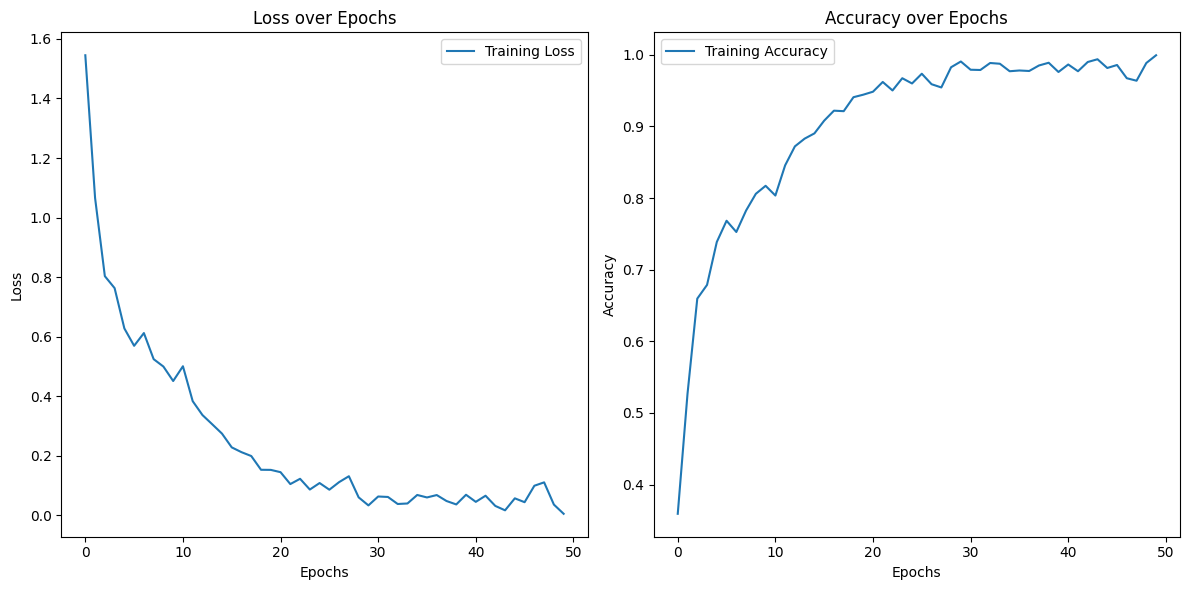

In [15]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:

# Evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 793ms/step - accuracy: 0.7509 - loss: 5.4108
Test loss: 5.682480335235596
Test accuracy: 0.7563451528549194


In [17]:
model.save("model.h5") # replace model.h5 in "Runner"

In [18]:

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(Y_test, y_pred_bool))

7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 291ms/step
              precision    recall  f1-score   support

           0       0.96      0.24      0.38       100
           1       0.72      0.99      0.83       115
           2       0.70      1.00      0.83       105
           3       0.90      0.74      0.81        74

    accuracy                           0.76       394
   macro avg       0.82      0.74      0.71       394
weighted avg       0.81      0.76      0.71       394



Model 2: InceptionV3

In [19]:
from keras.applications import InceptionV3

In [20]:
# Load the InceptionV3 model without the top layers
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
# Build the model
model_inception = Sequential()
model_inception.add(inception_model)
model_inception.add(Flatten())
model_inception.add(Dense(256, activation='relu'))
model_inception.add(Dense(4, activation='softmax'))

In [22]:
# Freeze base InceptionV3 layers
for layer in inception_model.layers:
    layer.trainable = False

In [34]:
# Compile the model
model_inception.compile(loss='sparse_categorical_crossentropy',
                        optimizer='adam',
                        metrics=['accuracy'])

In [24]:
# Train the model
history_inception = model_inception.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 45s 307ms/step - accuracy: 0.5784 - loss: 8.4305 - val_accuracy: 0.6701 - val_loss: 2.5302
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9110 - loss: 0.2553 - val_accuracy: 0.7665 - val_loss: 2.2498
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9519 - loss: 0.1299 - val_accuracy: 0.7995 - val_loss: 1.8274
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9795 - loss: 0.0602 - val_accuracy: 0.7970 - val_loss: 1.9966
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.7766 - val_loss: 2.6489
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.7817 - val_loss: 2.3534
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.7843 - val_loss: 2.0972
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.7893

In [30]:
model_inception.save('model_InceptionV3.h5')

Model 3: EfficientNetB0

In [25]:
from keras.applications import EfficientNetB0

# Load the EfficientNetB0 model without the top layers
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
# Build the model
model_efficientnet = Sequential()
model_efficientnet.add(efficientnet_model)
model_efficientnet.add(Flatten())
model_efficientnet.add(Dense(256, activation='relu'))
model_efficientnet.add(Dense(4, activation='softmax'))

In [28]:
# Freeze base EfficientNetB0 layers
for layer in efficientnet_model.layers:
    layer.trainable = False

# Compile the model
model_efficientnet.compile(loss='sparse_categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [29]:
# Train the model
history_efficientnet = model_efficientnet.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 63s 431ms/step - accuracy: 0.2692 - loss: 9.0313 - val_accuracy: 0.1878 - val_loss: 1.4039
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.2778 - loss: 1.5512 - val_accuracy: 0.1878 - val_loss: 1.4865
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.2598 - loss: 1.4408 - val_accuracy: 0.1878 - val_loss: 1.5048
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.3024 - loss: 1.4385 - val_accuracy: 0.2538 - val_loss: 1.5026
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.2921 - loss: 1.4155 - val_accuracy: 0.2919 - val_loss: 1.5233
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2849 - loss: 1.4368 - val_accuracy: 0.2538 - val_loss: 1.5206
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.2793 - loss: 1.4078 - val_accuracy: 0.2919 - val_loss: 1.4632
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.2948 - loss: 1.4063 - val_accuracy: 0.1878 

In [31]:
model_efficientnet.save('model_EfficientNetB0.h5')

Comparisons

Plotting Training and Validation Accuracy/Loss

In [38]:
def plot_metrics(history, model_name):
    # Get training and validation metrics (if available)
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


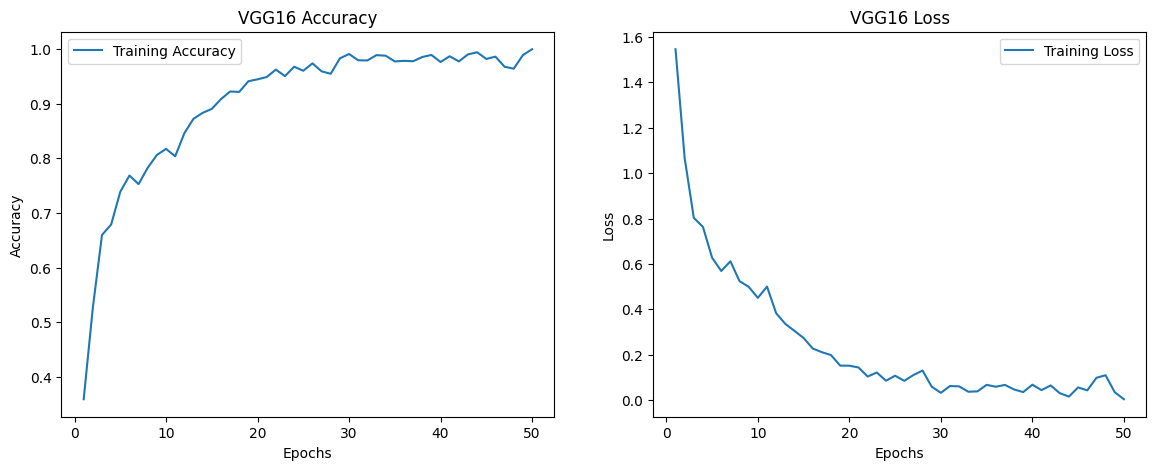

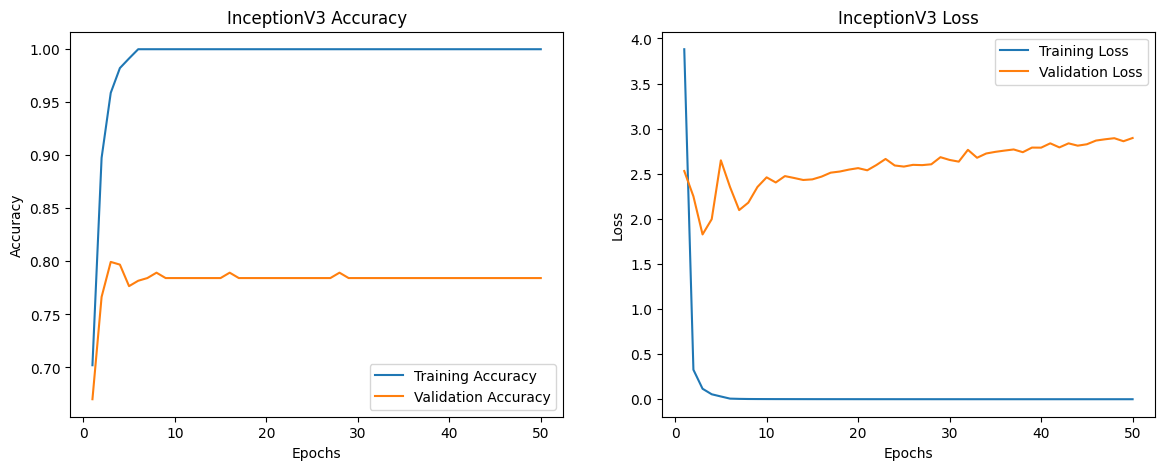

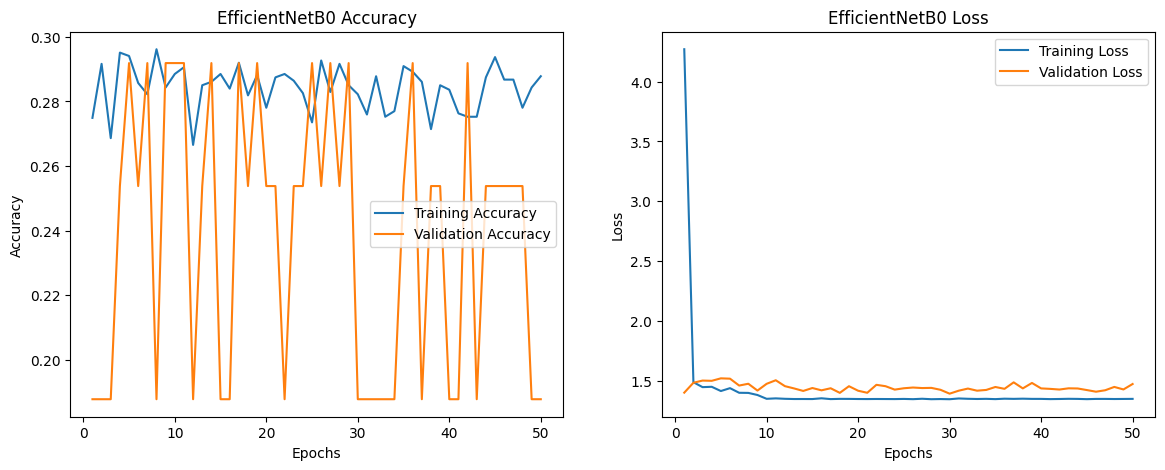

In [40]:
# Plotting metrics for VGG16
plot_metrics(history, "VGG16")

# Plotting metrics for InceptionV3
plot_metrics(history_inception, "InceptionV3")

# Plotting metrics for EfficientNetB0
plot_metrics(history_efficientnet, "EfficientNetB0")

Overlayed Accuracy and Loss Comparison

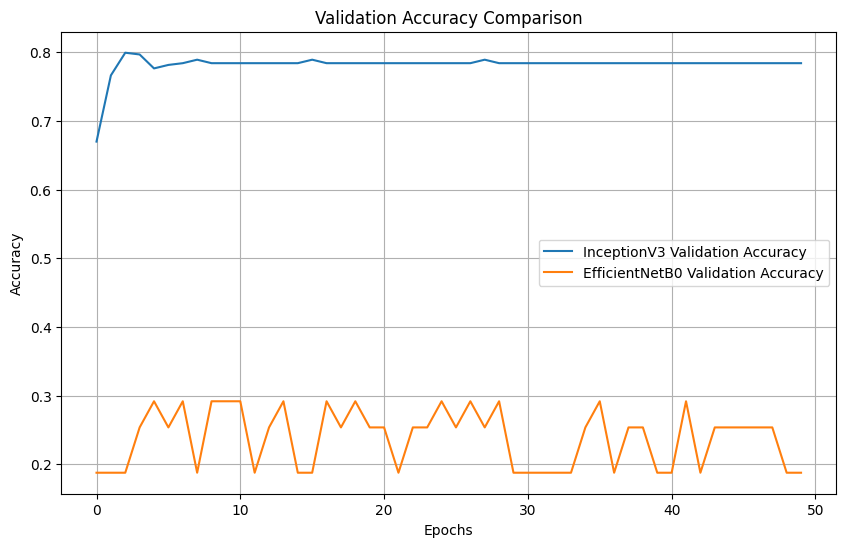

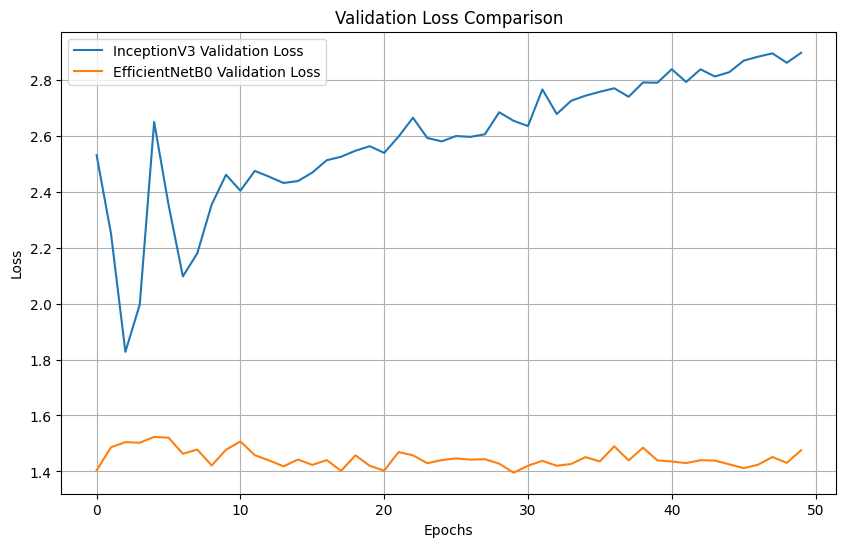

In [41]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))

# VGG16 Validation Accuracy
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='VGG16 Validation Accuracy')

# InceptionV3 Validation Accuracy
if 'val_accuracy' in history_inception.history:
    plt.plot(history_inception.history['val_accuracy'], label='InceptionV3 Validation Accuracy')

# EfficientNetB0 Validation Accuracy
if 'val_accuracy' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['val_accuracy'], label='EfficientNetB0 Validation Accuracy')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss comparison
plt.figure(figsize=(10, 6))

# VGG16 Validation Loss
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='VGG16 Validation Loss')

# InceptionV3 Validation Loss
if 'val_loss' in history_inception.history:
    plt.plot(history_inception.history['val_loss'], label='InceptionV3 Validation Loss')

# EfficientNetB0 Validation Loss
if 'val_loss' in history_efficientnet.history:
    plt.plot(history_efficientnet.history['val_loss'], label='EfficientNetB0 Validation Loss')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [42]:
print(history.history.keys())  # For VGG16
print(history_inception.history.keys())  # For InceptionV3
print(history_efficientnet.history.keys())  # For EfficientNetB0

dict_keys(['accuracy', 'loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
